## Step 1: Clone Passport Dataset from Hugging Face

First, clone the passport dataset repository:
```bash
git clone https://huggingface.co/datasets/akashsalmuthe/passportDataset
```

This will download the dataset to `passportDataset/` folder containing `passportData.arrow` file.

## Step 2: Install Required Dependencies

In [1]:
!pip install pyarrow datasets pillow tqdm

  Using cached aiohappyeyeballs-2.6.1-py3-none-any.whl.metadata (5.9 kB)
  Using cached aiosignal-1.4.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/28.1 MB ? eta -:--:--
   ----- ---------------------------------- 3.9/28.1 MB 21.5 MB/s eta 0:00:02
   --------------------- ------------------ 14.9/28.1 MB 37.6 MB/s eta 0:00:01
   ---------------------------------------  28.0/28.1 MB 48.1 MB/s eta 0:00:01
   ---------------------------------------- 28.1/28.1 MB 41.5 MB/s  0:00:00
   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   ---------------------------------------- 2.9/2.9 MB 56.2 MB/s  0:00:00
Using cached aiohappyeyeballs-2.6.1-py3-none-any.whl (15 kB)
Using cached aiosignal-1.4.0-py3-none-any.whl (7.5 kB)
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   --------------

## Step 3: Import Libraries

In [2]:
import os
import pyarrow as pa
from PIL import Image
import io
from tqdm import tqdm
from datasets import Dataset

c:\Users\Lenovo\anaconda3\envs\kyc-aml-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Step 4: Configure Paths

In [ ]:
# Path to the cloned dataset Arrow file
# After running: git clone https://huggingface.co/datasets/akashsalmuthe/passportDataset
ARROW_FILE = r"C:\Users\Lenovo\Downloads\passportDataset\passportData.arrow"

# Output directory (will create passport folders in train/valid)
OUTPUT_DIR = "dataset"

# Verify file exists
if os.path.exists(ARROW_FILE):
    file_size = os.path.getsize(ARROW_FILE) / (1024 * 1024)
    print(f"✓ Arrow file found: {ARROW_FILE}")
    print(f"✓ File size: {file_size:.2f} MB")
else:
    print(f"❌ Arrow file not found: {ARROW_FILE}")
    print("\nPlease check:")
    print("1. Run: git clone https://huggingface.co/datasets/akashsalmuthe/passportDataset")
    print("2. Verify the file path matches your download location")

✓ Arrow file found: C:\Users\Lenovo\Downloads\passportDataset\passportData.arrow
✓ File size: 284.45 MB


## Step 5: Load Arrow Dataset

In [4]:
print("📦 Loading Arrow dataset...\n")

try:
    # Load dataset using Hugging Face datasets library
    dataset = Dataset.from_file(ARROW_FILE)
    
    print(f"✓ Dataset loaded successfully!")
    print(f"✓ Number of records: {len(dataset)}")
    print(f"✓ Features: {list(dataset.features.keys())}")
    print(f"\nDataset info:")
    print(dataset)
    
except Exception as e:
    print(f"❌ Error loading dataset: {e}")
    import traceback
    traceback.print_exc()

📦 Loading Arrow dataset...

✓ Dataset loaded successfully!
✓ Number of records: 600
✓ Features: ['caption', 'image']

Dataset info:
Dataset({
    features: ['caption', 'image'],
    num_rows: 600
})


## Step 6: Inspect Sample Data

In [5]:
# Display first record to understand structure
print("📋 First record structure:\n")
first_record = dataset[0]

for key, value in first_record.items():
    value_type = type(value).__name__
    if isinstance(value, Image.Image):
        print(f"  {key}: PIL Image ({value.size})")
    elif isinstance(value, (bytes, bytearray)):
        print(f"  {key}: {value_type} ({len(value)} bytes)")
    elif isinstance(value, dict):
        print(f"  {key}: dict with keys {list(value.keys())}")
    else:
        print(f"  {key}: {value_type}")

📋 First record structure:

  caption: str
  image: PIL Image ((265, 409))


## Step 7: Display Sample Image

✓ Found image in field: 'image'
  Image size: (265, 409)
  Image mode: RGB


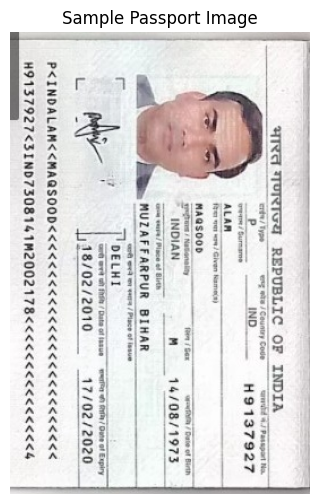

In [6]:
import matplotlib.pyplot as plt

# Find and display the first image
sample = dataset[0]

# Try to find image field
image = None
image_key = None

for key, value in sample.items():
    if isinstance(value, Image.Image):
        image = value
        image_key = key
        break
    elif 'image' in key.lower():
        try:
            if isinstance(value, dict) and 'bytes' in value:
                image = Image.open(io.BytesIO(value['bytes']))
            elif isinstance(value, bytes):
                image = Image.open(io.BytesIO(value))
            image_key = key
            break
        except:
            continue

if image:
    print(f"✓ Found image in field: '{image_key}'")
    print(f"  Image size: {image.size}")
    print(f"  Image mode: {image.mode}")
    
    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    plt.axis('off')
    plt.title('Sample Passport Image')
    plt.show()
else:
    print("❌ No image found in dataset")
    print("Please check the dataset structure above")

## Step 8: Extract and Save Images

In [7]:
# Create output directories
train_passport_dir = os.path.join(OUTPUT_DIR, "train", "passport")
valid_passport_dir = os.path.join(OUTPUT_DIR, "valid", "passport")

os.makedirs(train_passport_dir, exist_ok=True)
os.makedirs(valid_passport_dir, exist_ok=True)

print(f"📁 Created directories:")
print(f"   {train_passport_dir}")
print(f"   {valid_passport_dir}")
print()

📁 Created directories:
   roboflow_dataset\train\passport
   roboflow_dataset\valid\passport



In [8]:
print("🖼️  Extracting and saving images...\n")

train_count = 0
valid_count = 0
error_count = 0

# Extract images with progress bar
for i, example in enumerate(tqdm(dataset, desc="Processing images")):
    try:
        # Find image in the example
        image = None
        
        for key, value in example.items():
            if isinstance(value, Image.Image):
                image = value
                break
            elif isinstance(value, dict) and 'bytes' in value:
                image = Image.open(io.BytesIO(value['bytes']))
                break
            elif isinstance(value, bytes):
                try:
                    image = Image.open(io.BytesIO(value))
                    break
                except:
                    continue
        
        if image is None:
            error_count += 1
            continue
        
        # Convert to RGB if needed
        if image.mode != 'RGB':
            image = image.convert('RGB')
        
        # Split: 90% train, 10% valid
        is_train = (i % 10) != 0
        
        if is_train:
            output_path = os.path.join(train_passport_dir, f"passport_{train_count:04d}.jpg")
            train_count += 1
        else:
            output_path = os.path.join(valid_passport_dir, f"passport_{valid_count:04d}.jpg")
            valid_count += 1
        
        # Save image
        image.save(output_path, 'JPEG', quality=95)
        
    except Exception as e:
        error_count += 1
        if error_count <= 5:  # Show first 5 errors
            print(f"\n⚠️  Error processing image {i}: {e}")

print("\n" + "="*60)
print("✅ EXTRACTION COMPLETE!")
print("="*60)
print(f"📊 Train images: {train_count}")
print(f"📊 Valid images: {valid_count}")
print(f"📊 Total extracted: {train_count + valid_count}")
if error_count > 0:
    print(f"⚠️  Errors: {error_count}")
print()

🖼️  Extracting and saving images...



Processing images: 100%|██████████| 600/600 [00:08<00:00, 70.08it/s] 


✅ EXTRACTION COMPLETE!
📊 Train images: 540
📊 Valid images: 60
📊 Total extracted: 600



## Step 9: Verify Extraction

In [9]:
# Count files in directories
train_files = [f for f in os.listdir(train_passport_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
valid_files = [f for f in os.listdir(valid_passport_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

print("📁 Directory verification:")
print(f"   {train_passport_dir}")
print(f"   └─ {len(train_files)} images")
print(f"   {valid_passport_dir}")
print(f"   └─ {len(valid_files)} images")
print(f"\n✓ Total passport images: {len(train_files) + len(valid_files)}")

📁 Directory verification:
   roboflow_dataset\train\passport
   └─ 540 images
   roboflow_dataset\valid\passport
   └─ 60 images

✓ Total passport images: 600


## Step 10: Display Sample Extracted Images

In [ ]:
import random

# Display 6 random samples from train set
num_samples = min(6, len(train_files))
sample_files = random.sample(train_files, num_samples)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, filename in enumerate(sample_files):
    img_path = os.path.join(train_passport_dir, filename)
    img = Image.open(img_path)
    
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(filename, fontsize=10)

plt.suptitle('Sample Passport Images (Training Set)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Step 11: Complete Dataset Summary

In [ ]:
def count_all_classes(base_dir):
    """Count images per class in train and valid sets"""
    stats = {}
    
    for split in ['train', 'valid']:
        split_dir = os.path.join(base_dir, split)
        if not os.path.exists(split_dir):
            continue
            
        stats[split] = {}
        
        for class_name in os.listdir(split_dir):
            class_dir = os.path.join(split_dir, class_name)
            if os.path.isdir(class_dir):
                image_files = [f for f in os.listdir(class_dir) 
                             if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
                stats[split][class_name] = len(image_files)
    
    return stats

# Get complete dataset statistics
dataset_stats = count_all_classes(OUTPUT_DIR)

print("\n" + "="*60)
print("📊 COMPLETE DATASET STATISTICS")
print("="*60)

for split, classes in dataset_stats.items():
    print(f"\n{split.upper()} SET:")
    total = 0
    for class_name, count in sorted(classes.items()):
        print(f"  - {class_name}: {count} images")
        total += count
    print(f"  TOTAL: {total} images")

# Calculate grand total
grand_total = sum(sum(classes.values()) for classes in dataset_stats.values())
print(f"\n🎯 GRAND TOTAL: {grand_total} images")

# Check if we have all 5 classes
all_classes = set()
for classes in dataset_stats.values():
    all_classes.update(classes.keys())

print(f"\n📋 Classes in dataset: {sorted(all_classes)}")

expected_classes = {'aadhar', 'driving', 'pan', 'voter', 'passport'}
if all_classes == expected_classes:
    print("\n✅ All 5 classes present! Ready for training.")
else:
    missing = expected_classes - all_classes
    if missing:
        print(f"\n⚠️  Missing classes: {missing}")
    extra = all_classes - expected_classes
    if extra:
        print(f"\n⚠️  Extra classes: {extra}")

## Summary

✅ Passport dataset cloned from Hugging Face  
✅ Passport images extracted from Arrow dataset  
✅ Images organized into train/valid splits  
✅ Dataset ready for training  

**Hugging Face Dataset:** [akashsalmuthe/passportDataset](https://huggingface.co/datasets/akashsalmuthe/passportDataset)

**Dataset Structure:**
```
dataset/
├── train/
│   ├── aadhar/
│   ├── driving/
│   ├── pan/
│   ├── voter/
│   └── passport/  ← NEW!
└── valid/
    ├── aadhar/
    ├── driving/
    ├── pan/
    ├── voter/
    └── passport/  ← NEW!
```

**Next Steps:**
1. Verify all 5 classes are present
2. Train the classifier with complete dataset
3. Run: `python training/train_classifier.py --data dataset/train --epochs 20`